# Data Science Capstone Project 
##  Analysis of Computer Process Events from the Comprehensive, Multi-Source Cybersecurity Events 

## Kimberly Nowell-Berry
###  September 2017

### Purpose
The purpose of this capstone project is analyze and visualize data from the Comprehensive, Multi-Source Cybersecurity Events.  Specifically, this project concentrates on process events. Exploratory data analysis of Windows-based process events that includes visualizations and observations is presented.  In cybersecurity, information about processes can be used to identify anomalous processes that may indicate the presence of malware, advanced persistent threats (APTs), unauthorized changes to the system, or more generally, performance information about the processes or computers themselves.  This project tries to identify similar users, i.e., users that run similar processes.

### Data

The data used in this capstone project is a 58 day, de-identified capture of users, computers, and processes on a network.  The data was retrieved from Windows endpoints/computers on the network and although de-identified, maintain  similar information to what can be found in normal Windows Security Event Logs.  This particular data, for individual computer systems directly translate to Windows start and stop event IDs: 4688 and 4689.  These represent granular workstation activity and can be used to identify what happens on the workstation after the user has logged in. The data do not include full path information of the processes themselves, nor does it include command options that may have been used during process start events.  The data was made available from Los Alamos National Laboratory, and can be retrieved here:
https://csr.lanl.gov/data/cyber1/

A. D. Kent, “Comprehensive, Multi-Source Cybersecurity Events,” Los Alamos National Laboratory, http://dx.doi.org/10.17021/1179829, 2015.

#### Data Format
The data will have the format of: 
"time,user@domain,computer,process name,start/end" and represents a process event at the given time. 

1. time
 Time starts at epoch 1 and increments at 1 second.  
2. user@domain
 This data identifies a unique user.  You might see U1@DOM1 and U1@COMP2.  These are unique users:  the first identifies a user on a domain, and the second identifies a local user account on a computer.  This may translate in reality to the same person, but from a logging event, they are unique accounts, i.e., the person may have 2 accounts.  This cannot be assumed, however, and is treated as unique.  Unique identification of users helps attribution of events.
3.  computer
 This data identifies a unique computer.
4.  process name
 This data identifies unique processes. 
5.  start/end
 This is a categorical feature that identifies whether or not the process in the event was started or stopped.  

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data
Importing here, sampling only 50000 allows for initial data analysis.  Ultimately, this should take in the entire data set.

In [2]:
columns = ['time', 'username', 'computer', 'process_name', 'start_or_stop']
df = pd.read_csv("./proc.txt", nrows=50000)
df.columns=columns

### Feature Analysis

#### Users 
Users are a principal component of this data set.  They are the actor of the event and can be used to attribute specific actions.

In [3]:
print("Total Number of Users: ", df['username'].nunique())
print("Maximum records for a user in the data: ", df['username'].value_counts().max())
print("User that was the most active: ", df['username'].mode()[0]) 

Total Number of Users:  3008
Maximum records for a user in the data:  1637
User that was the most active:  C1685$@DOM1


Below you can see an example of the various domains and local accounts that records were recorded from.  Distinguishing between local accounts versus domain accounts helps to refine Incident Response activities.  Restricting correlation of events to events on the network versus events local to a single computer is valuable information.

In [4]:
df.head(1000)['username'].str.split('@').apply(pd.Series)[1].value_counts()

DOM1     985
C2039      5
C1503      3
DOM3       2
C1504      2
C984       1
C2547      1
C398       1
Name: 1, dtype: int64

####  Computers 
Computers indicate where on network the processes were run.  

In [5]:
print("Total Number of Computers: ", df['computer'].nunique())
print("Number of events associated with the computer that was seen most frequently: ", df['computer'].value_counts().max())
print("Computer that was seen most frequently: ", df['computer'].mode()[0])

Total Number of Computers:  2471
Number of events associated with the computer that was seen most frequently:  1637
Computer that was seen most frequently:  C1685


##### Visualization of Computer Frequency

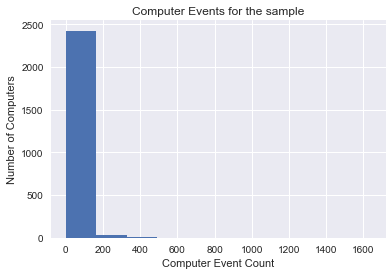

In [6]:
computers_df = df['computer'].value_counts().reset_index() 
columns = ['computer','count']
computers_df.columns=columns
plt.hist(computers_df['count'])
plt.title('Computer Events for the sample')
plt.ylabel('Number of Computers')
plt.xlabel('Computer Event Count')

1.  You can see from this visualization that most computers were seen on the network 150 times or less
2.  Some comuters were seen about 200-450 times
3.  The most unique computers were seen more than 1200 times.  These represent the most active computers on the network.

##### Visualization of Computer Frequency part 2
Because the previous visualization highly skewed, to understand the data better, the data is now represented in logscale.  This representation shows that most computers are seen approximately 150 times or less in the data set.  Representing in logscale removes the significance of outliers, and allows for better visualization.

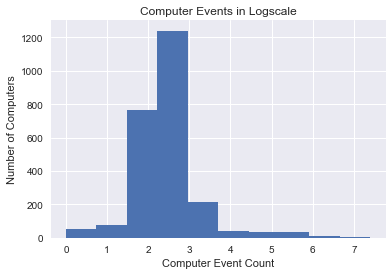

In [7]:
computers_df = df['computer'].value_counts().reset_index() 
columns = ['computer','count']
computers_df.columns=columns
plt.hist(computers_df['count'].apply(np.log))
plt.title('Computer Events in Logscale')
plt.ylabel('Number of Computers')
plt.xlabel('Computer Event Count')

#### Processes
Processes represent individual executables, programs, or applications running on a computer.

In [8]:
print("Total Number of Unique Processes: ", df['process_name'].nunique())
print("Process that was seen most frequently: ", df['process_name'].mode()[0])
print("The most frequently seen process was seen this many times: ", df['process_name'].value_counts().max())

Total Number of Unique Processes:  311
Process that was seen most frequently:  P16
The most frequently seen process was seen this many times:  10299


The describe method from pandas gives us some interesting information about the data. Most of the computers have less than 32 processes running on them for the given time period. The most unique processes were only seen once during the time period. 

In [9]:
process_df = df['process_name'].value_counts()
process_df.describe(percentiles=[.1,.25,.5,.75,.85,.90,.95,1])

count      311.000000
mean       160.771704
std        763.610838
min          1.000000
10%          1.000000
25%          2.000000
50%          6.000000
75%         31.000000
85%        111.500000
90%        191.000000
95%        860.000000
100%     10299.000000
max      10299.000000
Name: process_name, dtype: float64

##### Visualization of Process Frequency 

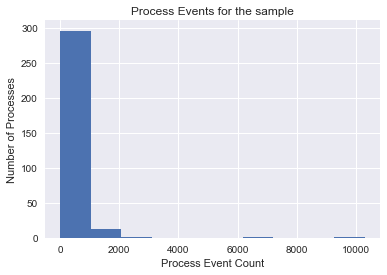

In [10]:
process_df = df['process_name'].value_counts().reset_index() 
columns = ['process_name','count']
process_df.columns=columns
plt.title('Process Events for the sample')
plt.ylabel('Number of Processes')
plt.xlabel('Process Event Count')
plt.hist(process_df['count']);

##### Visualization of Process Frequency part 2
Again, you can see that the data is highly skewed.  Using the logscale helps to visualize this data in a better fashion, neutralizing the significance of outliers.

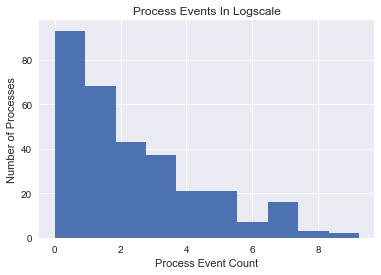

In [11]:
process_df = df['process_name'].value_counts().reset_index() 
columns = ['process_name','count']
process_df.columns=columns
plt.title('Process Events In Logscale')
plt.ylabel('Number of Processes')
plt.xlabel('Process Event Count')
plt.hist(process_df['count'].apply(np.log));

#### Time
Time is represented in seconds starting from 1 used to de-identify the data.

In [12]:
print("Latest Time seen in data: ", df['time'].max())
print("Earlieset Time seen in data: ", df['time'].min())

Latest Time seen in data:  1384
Earlieset Time seen in data:  1


#### Start/Stop Events
This data represents whether or not the process was started or whether the process was stopped.

In [13]:
print("Total number of start and stop events: ")
df['start_or_stop'].value_counts()

Total number of start and stop events: 


Start    35630
End      14370
Name: start_or_stop, dtype: int64

### Data Analysis
The following computes the average number of computers per user.  Because users can log in and use multiple computers, it is useful to identify what the average number of computers per user is in this data set.

In [14]:
avg_u = df.groupby(['username'])['computer'].nunique()
print("Average number of computers per user: ")
avg_u_mean = avg_u.mean()
print(avg_u_mean)

Average number of computers per user: 
1.016622340425532


The following computes the maximum number of computers used by a user.  This is useful to identify, particularly in cyber security as if the maximum number of computers used by a user is closer to the total number of computers in the envirtonment, this could possibly indicate a brute force attack.

In [15]:
print("Maximum number of computers used by a user")
avg_u_max = avg_u.max()
print(avg_u_max)

Maximum number of computers used by a user
9


#### User Similarity
For the purposes of this project, similar users are defined as users that have run the same or similar processes during the entire timeframe of the data.  The processes run is defined as any process activity or event without regard to start or stop status.  The inclusion of start or stop is excluded as, the event itself indicates that the processes was run during the timeframe, i.e., even if the event has a "stop" status, for our purposes, this is irrelevant as at some point in time, the process was started in order to be stopped.

To determine the similarity of users based on the process use, we __transform__ the data into a sparse matrix.

- Feature Transformation

We prepare the data by converting the process column into individual features; each row will have the a user in question, the user to be compared to the user in question, and the compared user's associated processes.  The presence of a process event in the data at any point in time will be indicated by a 1, otherwise, this will be 0.  The original matrix was in long format and the transformation resulted a wide matrix.

In [16]:
copy_df = df
del copy_df['time']
del copy_df['computer']
del copy_df['start_or_stop']
for x in copy_df.process_name.unique():
    copy_df[x]=(copy_df.process_name==x).astype(int)
del copy_df['process_name']
final_matrix = copy_df.groupby(['username']).max()
final_matrix.head()

,P4,P3,P16,P37,P5,P8,P96,P7,P11,P47,...,P333,P312,P174,P323,P315,P319,P320,P270,P330,P339
username,,,,,,,,,,,,,,,,,,,,,
C1$@DOM1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C10$@DOM1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
C100$@DOM1,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1000$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1001$@DOM1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see the sparse matrix above.

The shape of the matrix shows us that there are 3008 unique users and 311 unique processes.

In [17]:
final_matrix.shape

(3008, 311)

Next, we define a function to calcuate the Euclidean distance between a single user and the rest of the users in the data.  Euclidean distance was used as a basic distance measure between users.  

In [18]:
def euclidean_distance(user, df):
    result_df = pd.DataFrame(columns=['username','compared_user','distance'])
    mylist = []
    for i in df.index:
        distance = np.linalg.norm(df.loc[user]-final_matrix.loc[i])
        mylist.append([user, i, distance])
    result_df = pd.DataFrame(mylist, columns = ['username','compared_user','distance'])    
    return result_df

Following, we select a user from the data and compare this user with the rest of the users in the data.

In [19]:
user = 'C1001$@DOM1'
result_df = euclidean_distance(user, final_matrix)
result_df.head()

,username,compared_user,distance
0,C1001$@DOM1,C1$@DOM1,2.449490
1,C1001$@DOM1,C10$@DOM1,3.162278
2,C1001$@DOM1,C100$@DOM1,2.000000
3,C1001$@DOM1,C1000$@DOM1,1.414214
4,C1001$@DOM1,C1001$@DOM1,0.000000


In [20]:
result_df.distance.describe()

count    3008.000000
mean        2.397856
std         0.714443
min         0.000000
25%         2.000000
50%         2.449490
75%         2.828427
max         7.483315
Name: distance, dtype: float64

As expected, there are 3008 rows, the same number of users in the data set.
The minimum of zero indicates a distance of zero, meaning there were other users in the data set that ran the same processes during the same timeframe.  
The maximum of ~7 indicates that there are users that run distinctly different processes, more or less, or both.

##### Visualization of the User Similarity

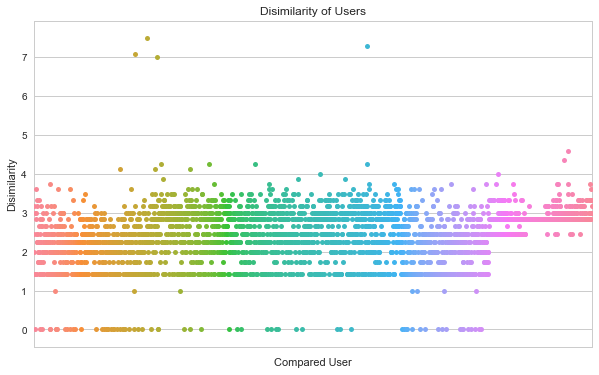

In [21]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
g = sns.swarmplot(x='compared_user', y='distance', data=result_df)
g.set_xticklabels([])
plt.title('Disimilarity of Users')
plt.xlabel('Compared User')
plt.ylabel('Disimilarity')

###### Discussion of the visualization
1.  Because we took the Euclidean distance between the user and all other users, users that are most similar are represented by values closer to or equal to zero.  
2.  At the same time, you can see that there are 4 users that are highly disimilar to the user selected.
3.  Most of the users fell within a distance of about 1.5 and 3.5.

### Conclusion and Further Research

In this project, a exploratory data analysis was performed on process events for users on a network.  Visualizations, discussions and observations were displayed.  Ultimately, a single user was chosen and compared to the population of other users in the data set.

Further research in this data set includes comparing the entire population of users to identify anomalous behavior in the form of process usage, and anomalous groups.  To do this, clustering techniques can be used to identify groups of similar users and identify outliers.  One example of user similarity was presented in this research; therefore, a comparison of the entire data set can be performed.  If this approach does not produce results, other analytic techniques could be used, such as Support Vector Machines.  Also, only Euclid  ean Distance was used in this project.  Other distance measures might be investigated to determine their effectiveness.  

Additionally, further analysis of the data to compare process start and stop events on a host by host basis could identify issues with event logging configuration.  Identification of long-lived versus short-lived processes could also be an interesting approach for future work.  Events that are long-lived with no terminate/stop event could be a potential indicator of APT.  Looking for outliers of normal behaviors of particular processes is also another approach that could be completed with this data set.  Processes that are normally short-lived, but have a long-lived outlier might, again, indicate APT. 

